<a href="https://colab.research.google.com/github/sn95033/pneumonia-detection/blob/master/Pneumonia_32_32_v3a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Childhood pneumonia detection 

* Student name: Rebecca Mih
* Student pace: Part Time Online
* Scheduled project review date/time: June 27, 2020 2:00 PM PDT
* Instructor name: James Irving
* Blog post URL: https://github.com/sn95033/pneumonia-detection


* **Data Source:** 
   - References: <br>https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia
<br> http://www.cell.com/cell/fulltext/S0092-8674(18)30154-5 <br> <br>

<div>
<img src= "childrens_pneumonia.png"
           width=400"/>
</div
             
<br> Illustrative Examples of Chest X-Rays in Patients with Pneumonia.
The normal chest X-ray (left panel) depicts clear lungs without any areas of abnormal opacification in the image. Bacterial pneumonia (middle) typically exhibits a focal lobar consolidation, in this case in the right upper lobe (white arrows), whereas viral pneumonia (right) manifests with a more diffuse ‘‘interstitial’’ pattern in both lungs.
http://www.cell.com/cell/fulltext/S0092-8674(18)30154-5

The dataset is organized into 3 folders (train, test, val) and contains subfolders for each image category (Pneumonia/Normal). There are 5,863 X-Ray images (JPEG) and 2 categories (Pneumonia/Normal).

Chest X-ray images (anterior-posterior) were selected from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou. All chest X-ray imaging was performed as part of patients’ routine clinical care.

For the analysis of chest x-ray images, all chest radiographs were initially screened for quality control by removing all low quality or unreadable scans. The diagnoses for the images were then graded by two expert physicians before being cleared for training the AI system. In order to account for any grading errors, the evaluation set was also checked by a third expert.

Acknowledgements
Data: https://data.mendeley.com/datasets/rscbjbr9sj/2

License: CC BY 4.0

Citation: http://www.cell.com/cell/fulltext/S0092-8674(18)30154-5
   

# Analysis Workflow (OSEMN)

1. **Obtain and Pre-process**
    - [x] Import data
    - [x] Inspect the training, test and validation data
    - [x] Check data size, loking for class imbalance
    - [x] Determine if images are unique - Review of filenames or other identifiers.  In this project it turns out that some of the images are of the same child (same person ID),  which suggests it's possible multiple images were taken. This inclusion of images of the same child, probably leads to more weighting towards those images for training the model. On the other hand, it would seem to be a form of image augmentation.
    - [x] Initialize GoogleDrive, and read in the data locally for fastest runtime. Setup drives for writing data / images <br><br>

2. **Data Scoping**
     - [x] Remove "duplicate images"  -- i.e. different images of the same child
     - [x] Determine class imbalance
     - [x] Set up image size experiments

3.  **Create a Baseline Neural Network Model**
    - [x] Split into train and test data 
    - [x] Run the model
    - [x] Review Quality indicators of the model <br><br>

4. **Create a Convolutional Neural Network Model**
    - [x] Compare the model quality
    - [x] Choose one or more models for grid searching <br><br>
    
5. **Revise data inputs if needed to improve quality indicators**
    - [x] By improving unbalanced datasets through image augmentation
    - [x] By speeding the model optimization by starting Transfer learning the initial weighting values from another model
    - [x] through use of subject matter knowledge <br><br>

    
6. **Write the Report**
    - [X] Explain key findings and recommended next steps


# Obtain and Pre-Process the Data

1. **Obtain and Pre-process**
    - [x] Import libraries
    - [x] Initialize GoogleDrive, and read in the data locally for fastest runtime. Setup drives for writing data / images 
    - [x] Inspect the training, test and validation data
    - [x] Check data size, review for class imbalance
    - [x] Determine if images are unique - Review of filenames or other identifiers. <br><br>
     In this project it turns out that some of the images are of the same child (same person ID),  i.e. multiple images were taken. This inadvertent inclusion of images of the same child, probably leads to more weighting towards those images for training the model. On the other hand, it's a form of image augmentation, since a child is hardly likely to sit still in exactly the same position, during x-ray . This data issue will be analysed in teh notebook, as to its impact on model accuracy.<br><br>
   

# 1. Importing Libraries

In [ ]:
!pip install -U imageio
!pip install -U scikit-image

!pip install pillow
!pip install opencv-contrib-python
!pip install -U fsds
!pip install -U tensorflow

!pip install -U keras
!pip install -U pandas 
!pip install -U pandas-profiling

# # %conda update matploltib
!pip install -U matplotlib

!pip install imgaug
!pip install mlxtend
#!pip install plot_keras_history

     |████████████████████████████████| 3.3MB 3.4MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: imageio 2.4.1
    Uninstalling imageio-2.4.1:
      Successfully uninstalled imageio-2.4.1
     |████████████████████████████████| 12.4MB 241kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scikit-image 0.16.2
    Uninstalling scikit-image-0.16.2:
      Successfully uninstalled scikit-image-0.16.2
     |████████████████████████████████| 71kB 2.2MB/s 
     |████████████████████████████████| 6.9MB 9.5MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.0-cp36-none-any.whl size=8693 sha256=d45e34805ff715d601d784a4baf0bb49c8ff04d481d6c35807d7b6e8223ca611
  Stored in directory: /root/.cache/pip/wheels/b2/ac/0a/b784f0afe26eaf52e88a7e15c7369090deea0354fa1c6fc689
  Created wheel f

Requirement already up-to-date: matplotlib in /usr/local/lib/python3.6/dist-packages (3.2.2)


In [ ]:
import os
import glob
import h5py
import shutil
import imgaug as aug
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mimg
import imgaug.augmenters as iaa
import tensorflow as tf
from os import listdir, makedirs, getcwd, remove
from os.path import isfile, join, abspath, exists, isdir, expanduser
from PIL import Image
from pathlib import Path
from skimage.io import imread
from skimage.transform import resize
from keras.models import Sequential, Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Input, Flatten, SeparableConv2D
from keras.layers import GlobalMaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.merge import Concatenate
from keras.optimizers import Adam, SGD, RMSprop
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import cv2
from keras import backend as K
#from plot_keras_history import plot_history
color = sns.color_palette(palette='YlGnBu')
%matplotlib inline


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [ ]:
#!pip install pillow
!pip install opencv-contrib-python
!pip install -U fsds_100719
from fsds_100719.imports import *


fsds_1007219  v0.7.22 loaded.  Read the docs: https://fsds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds_100719,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


[i] Pandas .iplot() method activated.


# Setup Google Drive and Read Data In Locally


In [ ]:

# 

from google.colab import drive
drive.mount('/gdrive',force_remount=True)
%cd /gdrive/My Drive/
%cd ~
%cd ..

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive/My Drive
/root
/


In [ ]:
# Procedure to load data from Google Drive into local memory in Colaboratory
# First set the path where the zipped data resides in Google Drive

# printout the current directory 
print(os.path.abspath(os.curdir))

#Set the path to the folder containing zipped data in Google drive
source_folder = r'/gdrive/My Drive/Datasets/'

#Search for a zip file using *.zip,  recursively search the folder.  
# Make sure there is only 1 zip file in the folder!
file = glob.glob(source_folder+'*.zip',recursive=True)[0]

# Print out the zipped file found.  Make sure it's the one you expected!
file

/


'/gdrive/My Drive/Datasets/17810_23812_bundle_archive.zip'

In [ ]:
# Read from the zip file into local memory

zip_path = file
!cp "{zip_path}" . 

!unzip -q 17810_23812_bundle_archive.zip  # Load the data into local memory
!rm 17810_23812_bundle_archive.zip

# Sometimes when you are running the notebook multiple times, the data will still be in memory
# And the text box will ask if you want to over-write the data.
# it's ok to select [N]one   which is the fastest

In [ ]:
#List the folder in local memory.  The folder name is chest_xray

import os,glob
os.path.abspath(os.curdir)
os.listdir()

['lib',
 'dev',
 'etc',
 'sbin',
 'root',
 'sys',
 'proc',
 'home',
 'usr',
 'var',
 'tmp',
 'run',
 'srv',
 'lib64',
 'boot',
 'bin',
 'opt',
 'mnt',
 'media',
 'chest_xray',
 'gdrive',
 '.dockerenv',
 'datalab',
 'tools',
 'swift',
 'dlib-19.18.0-cp36-cp36m-linux_x86_64.whl',
 'content',
 'tensorflow-1.15.2',
 'dlib-19.18.0-cp27-cp27mu-linux_x86_64.whl',
 'lib32']

In [ ]:
# Set the data directory to the folder chest_xray
import os,glob

data_dir = r'chest_xray/'
os.listdir(data_dir)

# We can see here that the train, test, and val folders are the current locataion,
# That is where the images are stored, according to the Kaggle documentation

['test', 'train', 'chest_xray', 'val', '__MACOSX']

In [ ]:
# Check you are still in the same data directory to the folder chest_xray
import os,glob

data_dir = r'chest_xray/'
os.listdir(data_dir)

# We can see here that the train, test, and val folders are the current locataion,
# That is where the images are stored, according to the Kaggle documentation

['test', 'train', 'chest_xray', 'val', '__MACOSX']

In [ ]:
# Set the directories to access train, validate, and test images

train_dir = data_dir + 'train/'

# Path to validation directory
val_dir = data_dir + 'val/'

# Path to test directory
test_dir = data_dir + 'test/'

In [ ]:
# First read in the train images
# Get the path to the non-pneumonia and pneumonia sub-directories
nop_train_dir = train_dir + 'NORMAL/'  #No Pnuemonia training directory
p_train_dir = train_dir + 'PNEUMONIA/' # Pneumonia training directory

# Get the list of all the images in the directory
nop_train_list = glob.glob(nop_train_dir+'*.jpeg')
p_train_list = glob.glob(p_train_dir+'*.jpeg')

# An empty list. We will insert the data into this list in (img_path, label) format
train_images = []

# Go through all the normal cases. The label for these cases will be 0
for img in nop_train_list:

    train_images.append((img,0))

# Go through all the pneumonia cases. The label for these cases will be 1
for img in p_train_list:
    train_images.append((img, 1))

# Get a pandas dataframe from the data we have in our list 
train_images = pd.DataFrame(train_images, columns=['image', 'label'],index=None)

# Shuffle the data 
#train_images = train_images.sample(frac=1.).reset_index(drop=True)

#######

# Read the test images in the same way
nop_test_dir = test_dir + 'NORMAL/'
p_test_dir = test_dir + 'PNEUMONIA/'

# Get the list of all the images
nop_test_list = glob.glob(nop_test_dir+'*.jpeg')
p_test_list = glob.glob(p_test_dir+'*.jpeg')

# An empty list. We will insert the data into this list in (img_path, label) format
test_images = []

# Go through all the normal cases. The label for these cases will be 0
for img in nop_test_list:
    test_images.append((img,0))

# Go through all the pneumonia cases. The label for these cases will be 1
for img in p_test_list:
    test_images.append((img,1))

# Get a pandas dataframe from the data we have in our list 
test_images = pd.DataFrame(test_images, columns=['image', 'label'],index=None)

# Look at the dataframe
display(train_images)
display(test_images)

,image,label
0,chest_xray/train/NORMAL/IM-0539-0001-0001.jpeg,0
1,chest_xray/train/NORMAL/IM-0487-0001.jpeg,0
2,chest_xray/train/NORMAL/IM-0477-0001.jpeg,0
3,chest_xray/train/NORMAL/NORMAL2-IM-0535-0001.jpeg,0
4,chest_xray/train/NORMAL/IM-0364-0001.jpeg,0
...,...,...
5211,chest_xray/train/PNEUMONIA/person1236_bacteria...,1
5212,chest_xray/train/PNEUMONIA/person639_virus_122...,1
5213,chest_xray/train/PNEUMONIA/person614_bacteria_...,1
5214,chest_xray/train/PNEUMONIA/person769_bacteria_...,1


,image,label
0,chest_xray/test/NORMAL/IM-0036-0001.jpeg,0
1,chest_xray/test/NORMAL/IM-0093-0001.jpeg,0
2,chest_xray/test/NORMAL/IM-0011-0001-0002.jpeg,0
3,chest_xray/test/NORMAL/NORMAL2-IM-0171-0001.jpeg,0
4,chest_xray/test/NORMAL/NORMAL2-IM-0345-0001.jpeg,0
...,...,...
619,chest_xray/test/PNEUMONIA/person17_virus_48.jpeg,1
620,chest_xray/test/PNEUMONIA/person118_bacteria_5...,1
621,chest_xray/test/PNEUMONIA/person1622_virus_281...,1
622,chest_xray/test/PNEUMONIA/person18_virus_49.jpeg,1


# Inspect the Image Data for Class Balance and Uniqueness

Number of Training Cases: 
 1    3875
0    1341
Name: label, dtype: int64 



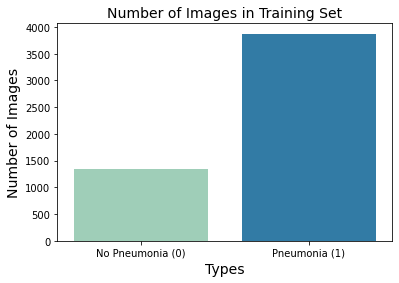

/gdrive/My Drive/Output


Number of Test Cases:  
 1    390
0    234
Name: label, dtype: int64 



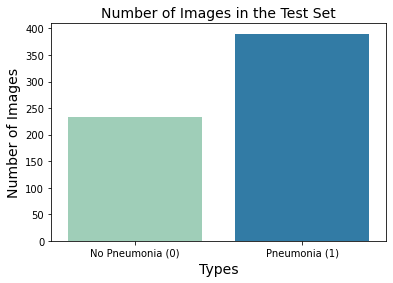

<Figure size 432x288 with 0 Axes>

In [ ]:
# Get the # of each class
num_train_cases = train_images['label'].value_counts()
print('Number of Training Cases:', '\n', num_train_cases, '\n')

# Plot the results 

sns.barplot(x=num_train_cases.index, y= num_train_cases.values, palette= 'YlGnBu')
plt.title('Number of Images in Training Set', fontsize=14)
plt.xlabel('Types', fontsize=14)
plt.ylabel('Number of Images', fontsize=14)
plt.xticks(range(len(num_train_cases.index)), ['No Pneumonia (0)', 'Pneumonia (1)'])
#plt.tight_layout()
plt.show();
%cd /gdrive/My Drive/'Output'/
plt.savefig("Training Set Image Data.png");

num_test_cases= test_images['label'].value_counts()
print('\n')
print('Number of Test Cases: ', '\n', num_test_cases, '\n')
sns.barplot(x=num_test_cases.index, y= num_test_cases.values, palette= 'YlGnBu')
plt.title('Number of Images in the Test Set', fontsize=14)
plt.xlabel('Types', fontsize=14)
plt.ylabel('Number of Images', fontsize=14)
plt.xticks(range(len(num_test_cases.index)), ['No Pneumonia (0)', 'Pneumonia (1)'])
plt.show();
plt.savefig("Test Set Image Data.png");

## There is a 3:1 Class imbalance which may need to be addressed through image augmentation

In [ ]:
# Reset to the appropriate folder
#source_folder = r'/gdrive/My Drive/Datasets/'
%cd /gdrive/My Drive/chest_xray/

/gdrive/My Drive/chest_xray


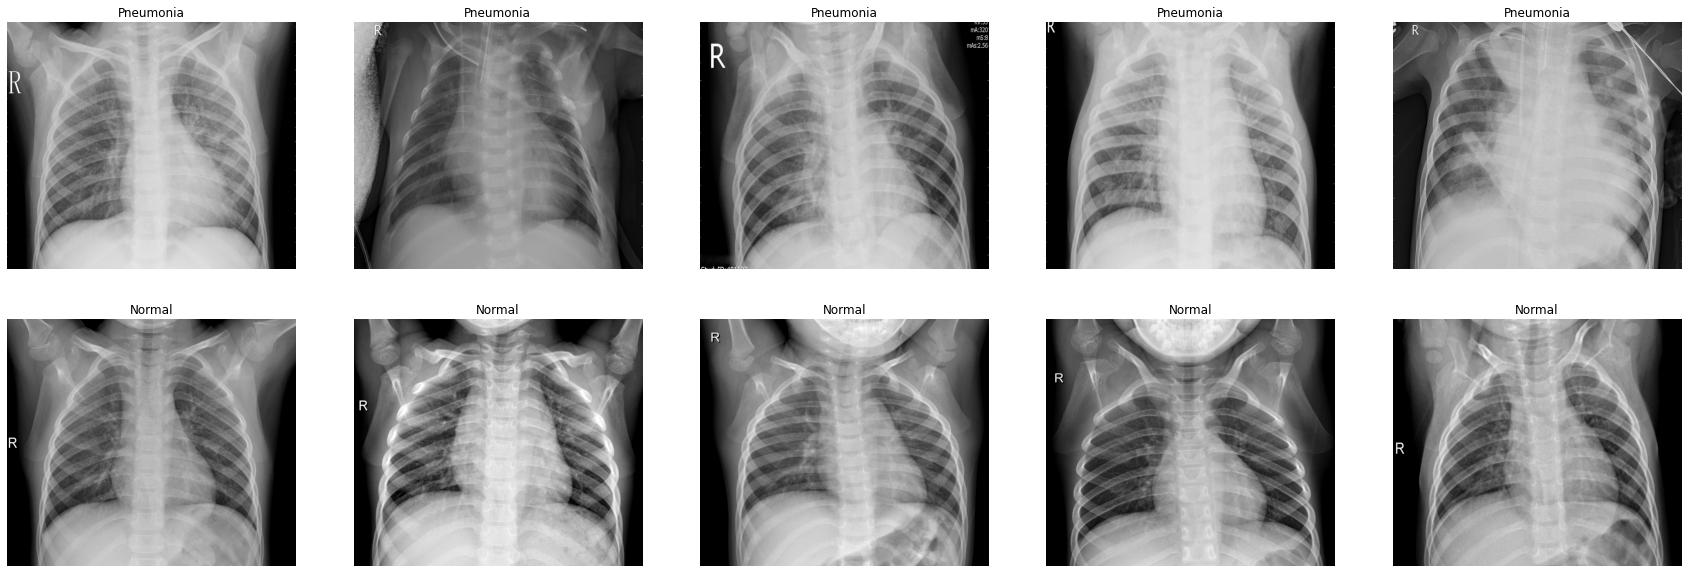

In [ ]:
# Get few samples for both the classes
pneumonia_samples = (train_images[train_images['label']==1]['image'].iloc[:5:1]).tolist()
normal_samples = (train_images[train_images['label']==0]['image'].iloc[:5:1]).tolist()

# Concat the data in a single list and del the above two list
train_samples = pneumonia_samples + normal_samples
del pneumonia_samples, normal_samples

# Plot the data 
f, ax = plt.subplots(2,5, figsize=(30,10))
for i in range(10):
    img = imread(train_samples[i])
    ax[i//5, i%5].imshow(img, cmap='gray')
    if i<5:
        ax[i//5, i%5].set_title("Pneumonia")
    else:
        ax[i//5, i%5].set_title("Normal")
    ax[i//5, i%5].axis('off')
    ax[i//5, i%5].set_aspect('auto')
plt.show();

In [ ]:
# change directory to the output folder and save the picture above
%cd /gdrive/My Drive/'Output'/
plt.savefig("Typical images of pneumonia and normal cases.png")

/gdrive/My Drive/Output


<Figure size 432x288 with 0 Axes>

In [ ]:
%cd /gdrive/My Drive/chest_xray

/gdrive/My Drive/chest_xray


In [ ]:
#Load the data as numbers by reading the RBG of the file
import cv2,glob,os
import itertools

# create a list of filenames for training and testing
train_img_filenames = [*p_train_list,*nop_train_list]
test_img_filenames = [*p_test_list,*nop_test_list]
print('Number of train filenames = ',len(train_img_filenames))
print('Number of test filenames = ', len(test_img_filenames))
train_img_filenames[:10]

Number of train filenames =  5216
Number of test filenames =  624


['chest_xray/train/PNEUMONIA/person479_virus_978.jpeg',
 'chest_xray/train/PNEUMONIA/person420_bacteria_1848.jpeg',
 'chest_xray/train/PNEUMONIA/person82_virus_155.jpeg',
 'chest_xray/train/PNEUMONIA/person848_virus_1493.jpeg',
 'chest_xray/train/PNEUMONIA/person997_bacteria_2926.jpeg',
 'chest_xray/train/PNEUMONIA/person452_bacteria_1943.jpeg',
 'chest_xray/train/PNEUMONIA/person594_virus_1145.jpeg',
 'chest_xray/train/PNEUMONIA/person315_bacteria_1464.jpeg',
 'chest_xray/train/PNEUMONIA/person1227_virus_2078.jpeg',
 'chest_xray/train/PNEUMONIA/person1376_virus_2367.jpeg']

In [ ]:
import cv2
def load_image_cv2(filename, RGB=True):
  """Function to load an image and convert the output to numbers
  Inputs: filename of the image to be read, string
  Pass RGB to the cv2 library to convert the image from BGR to RGB
  elses converts to gray scale """
  import cv2

  IMG = imread(filename)

  if RGB: cmap = cv2.COLOR_BGR2RGB
  else: cmap=cv2.COLOR_BGR2GRAY
  return cv2.cvtColor(IMG,cmap)

(1080, 1520, 3)


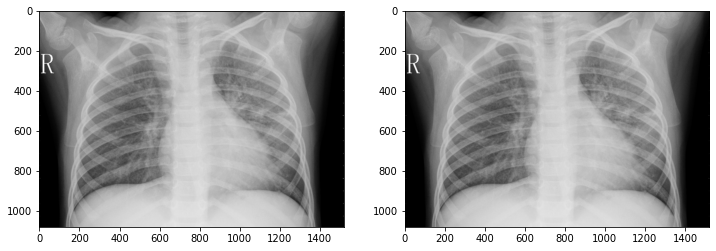

In [ ]:
## Load in and display image.
IMG = load_image_cv2(train_img_filenames[0],RGB=True)

## Even if you import as grayscale, must tell plt to use gray cmap
fig,ax= plt.subplots(ncols=2,figsize=(12,5))
ax[0].imshow(IMG)
ax[1].imshow(IMG,cmap='gray')
print(IMG.shape)

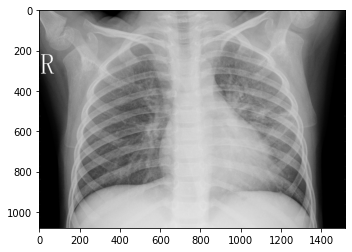

In [ ]:
## Using seaborn color palette with imshow
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette('gray',n_colors=25))

## Remove axes labels https://stackoverflow.com/a/2176591
[(a.get_xaxis().set_visible(False), a.get_yaxis().set_visible(False)) for a in ax]
plt.imshow(IMG,cmap=cmap);

In [ ]:
# Setup a directory to save images
*a,_=test_dir.split('/')
save_dir = '/'.join(a)
save_dir

'chest_xray/test'

In [ ]:
cv2.imwrite(save_dir+'sample_original.jpg',IMG)

True

(1080, 1520, 3)


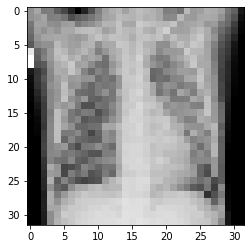

In [ ]:
## RESIZING IMAGES
print(IMG.shape)
size_32_32 = cv2.resize(IMG,(32,32))
plt.imshow(size_32_32,cmap=cmap);

In [ ]:
cv2.imwrite(save_dir+'sample_32_32.jpg',size_32_32)

True

(1080, 1520, 3)


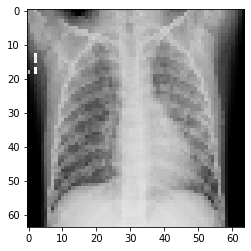

In [ ]:
## RESIZING IMAGES
print(IMG.shape)
size_64_64 = cv2.resize(IMG,(64,64))
plt.imshow(size_64_64,cmap=cmap);

In [ ]:
cv2.imwrite(save_dir+'sample_64_64.jpg',size_64_64)

True

(1080, 1520, 3)


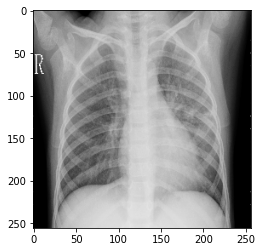

In [ ]:
## RESIZING IMAGES
print(IMG.shape)
size_256_256 = cv2.resize(IMG,(256,256))
plt.imshow(size_256_256,cmap=cmap);

In [ ]:
cv2.imwrite(save_dir+'sample_256_256.jpg',size_256_256)

True

## Load the Data
### Translate the image data into an Array
### Redfine the Train, Test, Validate splits as needed
### Encode the labels as Categorical
### Create X_train, X_test,X_val, y_train, y_test, y_val
### Store values in case internet is slow (using Pickle)


In [ ]:
# Translate all images to data, and change image size to reduce computation time

from PIL import Image
from keras.preprocessing import image

from imageio import imread
from skimage.transform import resize
import cv2
from tqdm import tqdm

# defining a function to read images and translate into data array
def read_img(img_path,target_size=(32, 32, 3)):
  '''Image reader which translates images to numbers
  Inputs:  img_path - the folder or directory where images are stored
           target_size = the new image size, usually reduced for faster
           computation time. Default is (64,64,3)   '''
  img = image.load_img(img_path, target_size=target_size)
  img_array = img_to_array(img)
 
  return img_array

def redefine_splits(p_train_list, nop_train_list, p_test_list, nop_test_list, 
                    img_size=(32,32,3), val_size=0.1):
  '''Redefine the splits by reading the original data from Train and test folders
  then running SKLearn train-test-split algorithm to create a validation set
  to be used during training.  Y labels defined as: 0 = no pneumonia,
  1 = pneumonia present

  Inputs: filenames of each imagefile in the separate folders by class for the 
  train and test data

  Outputs: X_train, X_test, X_val, y_train, y_test, y_val   '''

  # reading the images as image data, creating labels based on the directory
  # the data is in
  train_img = []
  train_label = []

  # pneumonia = 1
  for img_path in tqdm(p_train_list):

    train_img.append(read_img(img_path, target_size = img_size))
    train_label.append(1)

  for img_path in tqdm(nop_train_list):
    train_img.append(read_img(img_path, target_size = img_size))
    train_label.append(0)
      
  print('\n',pd.Series(train_label).value_counts())

  test_img = []
  test_label = []

  for img_path in tqdm(p_test_list):
      test_img.append(read_img(img_path, target_size= img_size))
      test_label.append(1)

  for img_path in tqdm(nop_test_list):
      test_img.append(read_img(img_path, target_size= img_size))
      test_label.append(0)

  print('\n',pd.Series(test_label).value_counts())

# Transform the train and test image data into numpy arrays
# Transform the train and test labels into categoricals

  from sklearn.model_selection import train_test_split
  X = np.array(train_img, np.float32)
  y = to_categorical(np.array(train_label))
  
  X_test = np.array(test_img, np.float32)
  y_test = to_categorical(np.array(test_label))

  X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.1)

  print('New Split Definitions:')
  print(f"X_train={len(X_train)}, X_test={len(X_test)}, X_val={len(X_val)}")
  
  return X_train, X_test, X_val, y_train, y_test,y_val 

In [ ]:
# Now execute the split redefinition
# Create a validation set that has 10% of the data 
X_train,X_test,X_val,y_train,y_test,y_val = redefine_splits(p_train_list, nop_train_list,
                                                                p_test_list, nop_test_list,
                                            val_size=0.1,img_size=(32,32,3))#(64,64,3))

train_test_val_vars = [X_train,X_test,X_val,y_train,y_test,y_val]


  0%|          | 0/390 [00:00<?, ?it/s]


 1    3875
0    1341
dtype: int64


100%|██████████| 234/234 [01:03<00:00,  3.68it/s]


 1    390
0    234
dtype: int64
New Split Definitions:
X_train=4694, X_test=624, X_val=522


In [ ]:
# Check which directory you are in
#import os,glob

data_dir = r'/gdrive/My Drive/Output/'
os.listdir(data_dir)

['Second Baseline-64-64-64.jpg',
 'Second Baseline-64-64-64-b.jpg',
 'Second Baseline-64-64-32.jpg',
 'Second Baseline-64-64-32-b.jpg',
 'Baseline-64-64-32.jpg',
 'Baseline-64-64-16.jpg',
 'Second Baseline-64-64-16.jpg',
 'Baseline-64-64-16_early.jpg',
 'best_model.h5',
 'Second Baseline-64-64-16-early.jpg',
 'Stored_Values',
 'Training Set Image Data.png',
 'Test Set Image Data.png',
 'Typical images of pneumonia and normal cases.png']

In [ ]:
# Because it takes so long to read the values and do the split, pickle the initial datasets
#%cd /gdrive/My Drive/
import pickle

with open('/gdrive/My Drive/Output/Stored_Values/Split_Recovery/orig_data_32_32_v3', 'wb') as f:
  pickle.dump([X_train, X_test, X_val, y_train, y_test, y_val], f)


In [ ]:
# Test reading the values from pickle
import pickle
testvar = []
with open('/gdrive/My Drive/Output/Stored_Values/Split_Recovery/orig_data_32_32_v3', 'rb') as f:
  testvar = pickle.load(f)
X_train = testvar[0]
X_test = testvar[1]
X_val = testvar[2]
y_train = testvar[3]
y_test = testvar[4]
y_val = testvar[5]

# Transform the shape of the data into a 2D vector which can be read by Keras

In [ ]:
# First understand the shape of the data and re-shape as needed
print(X_train.shape, X_test.shape)

(4694, 32, 32, 3) (624, 32, 32, 3)


In [ ]:
# X_train is 4694 images, with each image containing xpixels* ypixels*3  pixels of data
# This is in a 4 dimensional tensor
# In order to process the data, we have to re-shape the data to a two dimensional array
total_num_pixels = X_train[0].shape
total_num_pixels    # we need to move all the data into a 2-D array

(32, 32, 3)

In [ ]:
num_images = X_train[0]
reshape_value = num_images.shape[0] *num_images.shape[1]*num_images.shape[2]
reshape_value

3072

In [ ]:
X_train_img  = X_train.reshape(X_train.shape[0],reshape_value).astype('float32')/255
X_test_img  = X_test.reshape(X_test.shape[0],reshape_value).astype('float32')/255
X_val_img  = X_val.reshape(X_val.shape[0],reshape_value).astype('float32')/255

print(X_train_img.shape, X_test_img.shape, X_val_img.shape)

(4694, 3072) (624, 3072) (522, 3072)


In [ ]:
# Create a variable to store the shape of the data
SHAPES = total_num_pixels

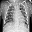

In [ ]:
# Check that the arrays created are correct by re-constructing an image
from PIL import Image
from keras.preprocessing import image

# Check one image
i = np.random.choice(range(len(y_train)))
# display(y_train[i])
display(image.array_to_img(X_train_img[i].reshape(total_num_pixels)))

# Create Evaluation Metrics


In [ ]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# From Flatiron School Codealong

def plot_keras_history(history,figsize=(10,4),subplot_kws={}):
    
    if hasattr(history,'history'):
        history=history.history
    try:
        acc_keys = list(filter(lambda x: 'acc' in x,history.keys()))
    except:
        print('No acc keys found')
        pass
    try:
        loss_keys = list(filter(lambda x: 'loss' in x,history.keys()))
    except:
        print('No loss keys found')

        pass
    
    plot_me = pd.DataFrame(history)
    
    fig,axes=plt.subplots(ncols=2,figsize=figsize,**subplot_kws)
    axes = axes.flatten()

    y_labels= ['Accuracy','Loss']
    for a, metric in enumerate([acc_keys,loss_keys]):
        for i in range(len(metric)):
            ax = pd.Series(history[metric[i]],
                        name=metric[i]).plot(ax=axes[a],label=metric[i])
    [ax.legend() for ax in axes]
    [ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True)) for ax in axes]
    [ax.set(xlabel='Epochs') for ax in axes]
    plt.suptitle('Model Training Results',y=1.01)
    plt.tight_layout()
    plt.show()
    return plt.gcf()


def plot_confusion_matrix(conf_matrix, classes = None, normalize=True,
                          title='Confusion Matrix', cmap="YlGnBu",
                          print_raw_matrix=False,
                          fig_size=(4,4)):
    """Check if Normalization Option is Set to True. 
    If so, normalize the raw confusion matrix before visualizing
    Note: Taken from bs_ds and modified

    Can pass a tuple of (y_true,y_pred) instead of conf matrix.

    Inputs: conf_matrix is the data returned 
    y_true are labels which were provided with the dataset
    y_pred are the predicted values from the model
    classes can be passed in

    Uses SKLearn metrics.confusion_matrix function to caluculate
    Output:  The confusion matrix figure
    
    """
    import itertools
    import numpy as np
    import matplotlib.pyplot as plt
    import sklearn.metrics as metrics
    
    ## make confusion matrix if given tuple of y_true,y_pred
    if isinstance(conf_matrix, tuple):
        y_true = conf_matrix[0].copy()
        y_pred = conf_matrix[1].copy()
        
        if y_true.ndim>1:
            y_true = y_true.argmax(axis=1)
        if y_pred.ndim>1:
            y_pred = y_pred.argmax(axis=1)
        cm = metrics.confusion_matrix(y_true,y_pred)
    else:
        cm = conf_matrix
        
    ## Generate integer labels for classes
    if classes is None:
        classes = list(range(len(cm)))  
        
    ## Normalize data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        fmt='.2f'
    else:
        fmt= 'd'
        
        
    fontDict = {
        'title':{
            'fontsize':16,
            'fontweight':'semibold',
            'ha':'center',
            },
        'xlabel':{
            'fontsize':14,
            'fontweight':'normal',
            },
        'ylabel':{
            'fontsize':14,
            'fontweight':'normal',
            },
        'xtick_labels':{
            'fontsize':10,
            'fontweight':'normal',
    #             'rotation':45,
            'ha':'right',
            },
        'ytick_labels':{
            'fontsize':10,
            'fontweight':'normal',
            'rotation':0,
            'ha':'right',
            },
        'data_labels':{
            'ha':'center',
            'fontweight':'semibold',

        }
    }

    # Create plot
    fig,ax = plt.subplots(figsize=fig_size)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,**fontDict['title'])
    plt.colorbar()

    tick_marks = classes#np.arange(len(classes))


    plt.xticks(tick_marks, classes, **fontDict['xtick_labels'])
    plt.yticks(tick_marks, classes,**fontDict['ytick_labels'])

    # Determine threshold for b/w text
    thresh = cm.max() / 2.

    # fig,ax = plt.subplots()
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 color='darkgray',**fontDict['data_labels']) #color="white" if cm[i, j] > thresh else "black"

    plt.tight_layout()
    plt.ylabel('True label',**fontDict['ylabel'])
    plt.xlabel('Predicted label',**fontDict['xlabel'])

    if print_raw_matrix:
        print_title = 'Raw Confusion Matrix Counts:'
        print('\n',print_title)
        print(conf_matrix);


    fig = plt.gcf()
    return fig


    

In [ ]:
#from mlxtend.plotting import plot_confusion_matrix
#from sklearn.metrics import confusion_matrix

def evaluate_model(y_true, y_pred,history=None):
  '''Function to evaluate model using Keras Accuracy classification
  This function calculations often predictions match binary lables
  Inputs: y_true, y_pred
  y_pred are predicted values for the samples run
  y_true are the labels provided in the datasets
  The argmax function is used to pull out the index for the maximum value of the list of values

  History is the object returned by fit(), and by model.evaluate()
  If history is true, the get the 
   '''
  from sklearn import metrics
  if y_true.ndim>1:
      y_true = y_true.argmax(axis=1)
  if y_pred.ndim>1:
      y_pred = y_pred.argmax(axis=1)   
      
  if history is not None:
      plot_keras_history(history)
      plt.show();
      plt.close();

  num_stars=20
  print('\n')
  print('***'*num_stars)
  print('\tCLASSIFICATION REPORT:')
  print('***'*num_stars)

  print(metrics.classification_report(y_true,y_pred))
  
  fig = plot_confusion_matrix((y_true,y_pred))
  plt.show()
    

# Start GPUs and RAM


In [ ]:
#https://colab.research.google.com/notebooks/pro.ipynb
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime → "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Mon Jul  6 06:05:51 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime → "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.4 gigabytes of available RAM

You are using a high-RAM runtime!


# Build Baseline Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

def make_baseline_model():
    model = Sequential()
    model.add(Dense(32,activation='relu',input_shape=(X_train_img.shape[1],)))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
model = make_baseline_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                98336     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 98,402
Trainable params: 98,402
Non-trainable params: 0
_________________________________________________________________


In [ ]:
EPOCHS = 1000
BATCH_SIZE = 32
PATIENCE=10

CALLBACKS = [EarlyStopping(monitor='val_loss', patience=PATIENCE, verbose=1),
             ModelCheckpoint(filepath='best_model_32_32.h5', monitor='val_loss', save_best_only=True, verbose=1)]
             
history = model.fit(X_train_img, y_train, epochs=EPOCHS, callbacks=CALLBACKS, # Early stopping
                    batch_size=BATCH_SIZE, steps_per_epoch=None,
                    validation_data = (X_val_img, y_val))

Train on 4694 samples, validate on 522 samples
Epoch 1/1000
4694/4694 [==============================] - 0s 88us/step - loss: 0.0883 - accuracy: 0.9697 - val_loss: 0.1126 - val_accuracy: 0.9617

Epoch 00001: val_loss improved from inf to 0.11262, saving model to best_model_32_32.h5
Epoch 2/1000
4694/4694 [==============================] - 0s 85us/step - loss: 0.0920 - accuracy: 0.9661 - val_loss: 0.1345 - val_accuracy: 0.9540

Epoch 00002: val_loss did not improve from 0.11262
Epoch 3/1000
4694/4694 [==============================] - 0s 86us/step - loss: 0.0865 - accuracy: 0.9725 - val_loss: 0.1050 - val_accuracy: 0.9693

Epoch 00003: val_loss improved from 0.11262 to 0.10504, saving model to best_model_32_32.h5
Epoch 4/1000
4694/4694 [==============================] - 0s 85us/step - loss: 0.0912 - accuracy: 0.9689 - val_loss: 0.1169 - val_accuracy: 0.9617

Epoch 00004: val_loss did not improve from 0.10504
Epoch 5/1000
4694/4694 [==============================] - 0s 88us/step - loss: 

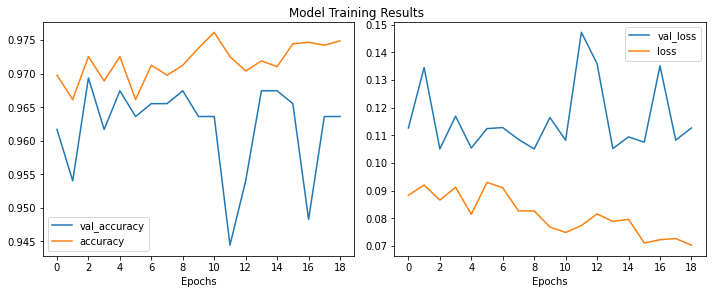

<Figure size 432x288 with 0 Axes>



************************************************************
	CLASSIFICATION REPORT:
************************************************************
              precision    recall  f1-score   support

           0       0.94      0.32      0.47       234
           1       0.71      0.99      0.82       390

    accuracy                           0.74       624
   macro avg       0.82      0.65      0.65       624
weighted avg       0.79      0.74      0.69       624



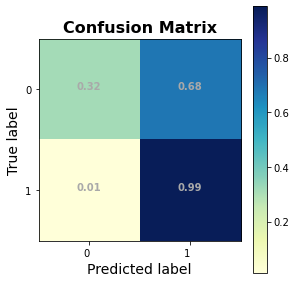

In [ ]:
y_hat_test = model.predict(X_test_img)
evaluate_model(y_test, y_hat_test,history)

In [ ]:
plt.savefig('Baseline-32-32-32_v3.jpg')

<Figure size 432x288 with 0 Axes>

# Conclusion for Baseline #1

Clearly the model using low resolution (32,32) images struggled to improve with just 2 dense connected layers, in the binary classification task.

In order to see whether the model would work better with more processing capability (64 vs 32 nodes) and a few more fully connected layers to process the pattern recognition differences between the images, we tried a second Baseline model

In [ ]:
def make_2nd_baseline_model():
    model = Sequential()
    model.add(Dense(64,activation='relu',input_shape=(X_train_img.shape[1],)))
    model.add(Dense(7, activation='relu'))
    model.add(Dense(5, activation='relu'))
    #model.add(Dense(1, activation='sigmoid'))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
    return model

In [ ]:
model = make_2nd_baseline_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                196672    
_________________________________________________________________
dense_4 (Dense)              (None, 7)                 455       
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 40        
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 12        
Total params: 197,179
Trainable params: 197,179
Non-trainable params: 0
_________________________________________________________________


In [ ]:
EPOCHS = 1000
BATCH_SIZE = 32
PATIENCE=10

CALLBACKS = [EarlyStopping(monitor='val_loss', patience=PATIENCE, verbose=1),
             ModelCheckpoint(filepath='best_model2_32_32_v3.h5', monitor='val_loss', 
                             save_best_only=True, verbose=1)]
             

#timer = Timer()
model = make_2nd_baseline_model()
model.summary()
#timer.start()
history = model.fit(X_train_img, y_train, epochs=EPOCHS, callbacks=CALLBACKS,
                      batch_size=BATCH_SIZE, validation_data=(X_val_img, y_val))
#timer.stop()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 64)                196672    
_________________________________________________________________
dense_8 (Dense)              (None, 7)                 455       
_________________________________________________________________
dense_9 (Dense)              (None, 5)                 40        
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 12        
Total params: 197,179
Trainable params: 197,179
Non-trainable params: 0
_________________________________________________________________
Train on 4694 samples, validate on 522 samples
Epoch 1/1000
4694/4694 [==============================] - 0s 99us/step - loss: 0.6367 - accuracy: 0.7288 - val_loss: 0.5908 - val_accuracy: 0.7433

Epoch 00001: val_loss improved from inf to 0.59085,

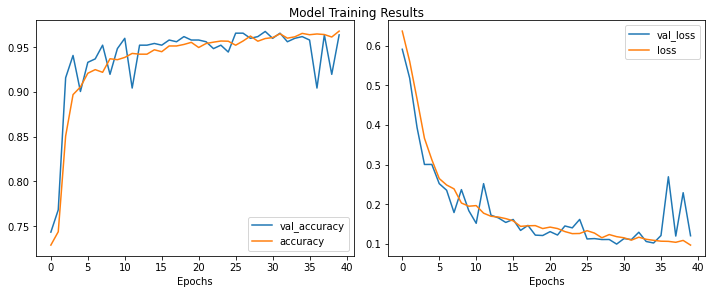

<Figure size 432x288 with 0 Axes>



************************************************************
	CLASSIFICATION REPORT:
************************************************************
              precision    recall  f1-score   support

           0       0.90      0.52      0.66       234
           1       0.77      0.96      0.86       390

    accuracy                           0.80       624
   macro avg       0.83      0.74      0.76       624
weighted avg       0.82      0.80      0.78       624



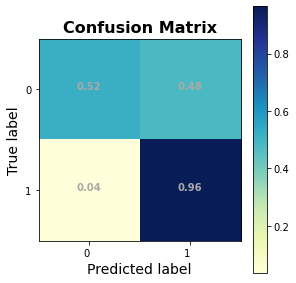

In [ ]:
y_hat_test = model.predict(X_test_img)

evaluate_model(y_test,y_hat_test,history)

In [ ]:
#%cd /gdrive/My Drive/'Output'/

In [ ]:
plt.savefig('Second Baseline-32-32-32-v3.jpg');

<Figure size 432x288 with 0 Axes>

# Results from Baseline #2

The Baseline 2 model was able to capture enough of the (32,32) image differences to make a 95% true positive classification (able to identify pneumonia).  However, the model was not able to properly identify True negativess (only slightly better than chance) with 52% accuracy for identifying children without pneumonia.  However, the result is still somewhat surprising, but what it needs is better feature delineation.

For the next step, we will try working with the Convolutional layers for better feature extraction, which then feed into the Dense layers for classification.

# Build a CNN Model

## Create an Optional DataGenerator Using Keras built-in Image Augmentation



In [ ]:
# Create a DataGenerator using Keras Image Augmentation
# May not be needed


def make_datagenerator():
  ''' Create training, test and validation by re-scaling and using data augmentation
  where application
  
  '''

  from keras.preprocessing.image import ImageDataGenerator

  train_datagen = ImageDataGenerator(rescale = 1./255)
                                  #shear_range = 0.2,
                                  #zoom_range = 0.2,
                                  #horizontal_flip = True)

  test_datagen = ImageDataGenerator(rescale = 1./255)
  val_datagen = ImageDataGenerator(rescale = 1./255)

  training_set = train_datagen.flow(X_train,y=y_train,batch_size=248)
  test_set = test_datagen.flow(X_test,y=y_test,batch_size=64)
  val_set = val_datagen.flow(X_val,y=y_val,batch_size=64)

  return training_set,test_set,val_set
    
training_set,test_set,val_set = make_datagenerator()    

In [ ]:
print(training_set[0][0].shape)
print('\nLabels for Batch')
print(training_set[0][1].shape)

(4694, 32, 32, 3)

Labels for Batch
(4694, 2)


In [ ]:
# Part 1 - Building the CNN
clock = fs.jmi.Clock()
clock.tic('')
EPOCHS = 100
BATCH_SIZE=32
PATIENCE=10

CALLBACKS = [EarlyStopping(monitor='val_accuracy', patience=PATIENCE, verbose=1),
             ModelCheckpoint(filepath='CNN1_32_32_v3.h5', monitor='val_accuracy', 
                             save_best_only=True, verbose=1)]

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(BATCH_SIZE, (3, 3),
                             input_shape = (SHAPES[0],
                                            SHAPES[1],
                                            SHAPES[2]),
                             activation = 'relu'))


# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(BATCH_SIZE, (3, 3),
                      activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = BATCH_SIZE, activation = 'relu'))
classifier.add(Dense(units = 2, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', 
                   loss = 'binary_crossentropy',
                   metrics = ['accuracy'])
display(classifier.summary())
# Part 2 - Fitting the CNN to the images

classifier.fit_generator(training_set,
                         steps_per_epoch = 80,
                         epochs = EPOCHS,
                         validation_data = test_set,
                         validation_steps = 10,
                         workers=-1, callbacks = CALLBACKS)

clock.toc('')

--- CLOCK STARTED @:    07/06/20 - 06:44:31 AM           Label:            --- 
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_23 (Dense)             (None, 32)                36896     
_______________________________________

None

Epoch 1/100
80/80 [==============================] - 10s 130ms/step - loss: 0.3758 - accuracy: 0.8292 - val_loss: 0.3882 - val_accuracy: 0.8277

Epoch 00001: val_accuracy improved from -inf to 0.82772, saving model to CNN1_32_32_v3.h5
Epoch 2/100
80/80 [==============================] - 10s 128ms/step - loss: 0.1322 - accuracy: 0.9498 - val_loss: 0.6576 - val_accuracy: 0.7436

Epoch 00002: val_accuracy did not improve from 0.82772
Epoch 3/100
80/80 [==============================] - 10s 127ms/step - loss: 0.0955 - accuracy: 0.9646 - val_loss: 0.6272 - val_accuracy: 0.7692

Epoch 00003: val_accuracy did not improve from 0.82772
Epoch 4/100
80/80 [==============================] - 10s 127ms/step - loss: 0.0798 - accuracy: 0.9712 - val_loss: 0.7464 - val_accuracy: 0.7588

Epoch 00004: val_accuracy did not improve from 0.82772
Epoch 5/100
80/80 [==============================] - 10s 127ms/step - loss: 0.0695 - accuracy: 0.9753 - val_loss: 0.6063 - val_accuracy: 0.7973

Epoch 00005: val_acc

Lap #,Start Time,Duration,Label
TOTAL,07/06/20 - 06:44:31 AM,"1 min, 53.355 sec",


0      1
1      1
2      1
3      1
4      1
      ..
517    1
518    1
519    1
520    1
521    1
Length: 522, dtype: int64


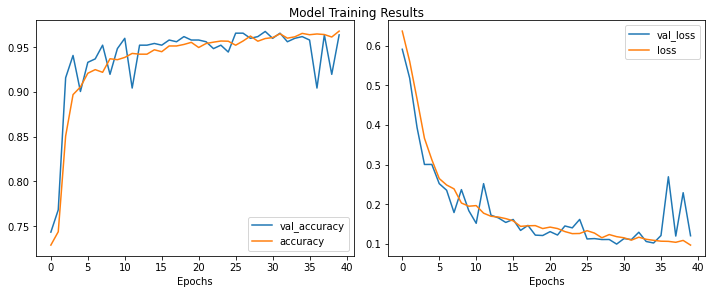

<Figure size 432x288 with 0 Axes>



************************************************************
	CLASSIFICATION REPORT:
************************************************************
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       134
           1       0.99      0.97      0.98       388

    accuracy                           0.97       522
   macro avg       0.95      0.97      0.96       522
weighted avg       0.97      0.97      0.97       522



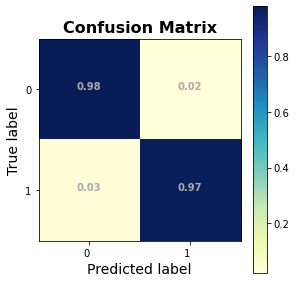

In [ ]:
# y_hat_test = classifier.predict_classes(X_test).flatten()
# pd.Series(y_hat_test).value_counts()
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

y_hat_val = classifier.predict_classes(X_val).flatten()
print(pd.Series(y_hat_val))
evaluate_model(y_val,y_hat_val,history)


In [ ]:
plt.savefig('CNN1-32-32-32-v3.jpg');

<Figure size 432x288 with 0 Axes>

# Results from the first Convolution Neural Network

This model featured just 2 convolutional layers for feature extraction, before the dense layers.

Apparently this provided enough feature clarity for the model to discriminate between those images showing pnuemonia and those that didn't show it.

It doesn't really appear that the model is overfitted (i.e. where the validation accuracy doesn't improve while the training accuracy continues to improve. 



In [ ]:
# Build a CNN with Dropout layers
EPOCHS=100
BATCH_SIZE=32
PATIENCE = 5
CALLBACKS = [EarlyStopping(monitor='val_accuracy', patience=PATIENCE, verbose=1),
             ModelCheckpoint(filepath='CNN2_dropout_32_32_v3.h5', monitor='val_accuracy', 
                             save_best_only=True, verbose=1)]

clock = fs.jmi.Clock()
clock.tic('')
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense,Dropout

# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(BATCH_SIZE, (3, 3),
                             input_shape = (SHAPES[0],
                                            SHAPES[1],
                                            SHAPES[2]),
                             activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.2))

# Adding a second convolutional layer
classifier.add(Conv2D(BATCH_SIZE, (3, 3),
                      activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.2))
# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = BATCH_SIZE, activation = 'relu'))
classifier.add(Dropout(0.2))
classifier.add(Dense(units = 2, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', 
                   loss = 'binary_crossentropy',
                   metrics = ['accuracy'])
display(classifier.summary())
# Part 2 - Fitting the CNN to the images

classifier.fit_generator(training_set,
                         steps_per_epoch = 50,
                         epochs = EPOCHS,
                         validation_data = test_set,
                         validation_steps = 5,workers=-1,
                         callbacks = CALLBACKS)

clock.toc('')

--- CLOCK STARTED @:    07/06/20 - 06:47:33 AM           Label:            --- 
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 6, 6, 32)          0         
_______________________________________

None

Epoch 1/100
50/50 [==============================] - 7s 140ms/step - loss: 0.5044 - accuracy: 0.7370 - val_loss: 0.4809 - val_accuracy: 0.6378

Epoch 00001: val_accuracy improved from -inf to 0.63782, saving model to CNN2_dropout_32_32_v3.h5
Epoch 2/100
50/50 [==============================] - 7s 135ms/step - loss: 0.2826 - accuracy: 0.8544 - val_loss: 0.3571 - val_accuracy: 0.8646

Epoch 00002: val_accuracy improved from 0.63782 to 0.86458, saving model to CNN2_dropout_32_32_v3.h5
Epoch 3/100
50/50 [==============================] - 7s 135ms/step - loss: 0.1934 - accuracy: 0.9181 - val_loss: 0.3250 - val_accuracy: 0.8670

Epoch 00003: val_accuracy improved from 0.86458 to 0.86699, saving model to CNN2_dropout_32_32_v3.h5
Epoch 4/100
50/50 [==============================] - 7s 136ms/step - loss: 0.1553 - accuracy: 0.9349 - val_loss: 0.3803 - val_accuracy: 0.8365

Epoch 00004: val_accuracy did not improve from 0.86699
Epoch 5/100
50/50 [==============================] - 7s 137ms/step - 

Lap #,Start Time,Duration,Label
TOTAL,07/06/20 - 06:47:33 AM,"0 min, 55.976 sec",


0      1
1      0
2      0
3      1
4      0
      ..
517    0
518    1
519    1
520    0
521    1
Length: 522, dtype: int64


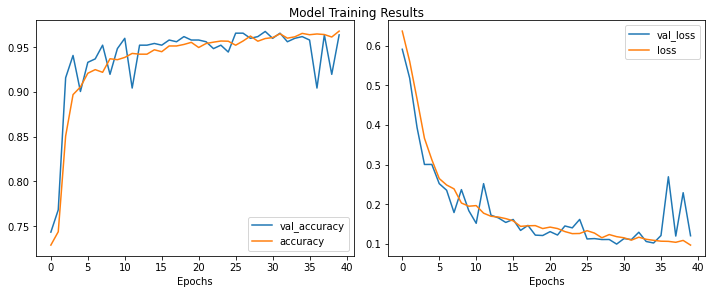

<Figure size 432x288 with 0 Axes>



************************************************************
	CLASSIFICATION REPORT:
************************************************************
              precision    recall  f1-score   support

           0       0.40      1.00      0.58       134
           1       1.00      0.49      0.66       388

    accuracy                           0.62       522
   macro avg       0.70      0.74      0.62       522
weighted avg       0.85      0.62      0.64       522



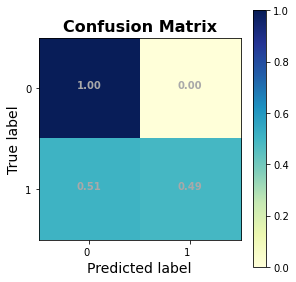

In [ ]:
# y_hat_test = classifier.predict_classes(X_test).flatten()
# pd.Series(y_hat_test).value_counts()
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

y_hat_val = classifier.predict_classes(X_val).flatten()
print(pd.Series(y_hat_val))
evaluate_model(y_val,y_hat_val, history)


In [ ]:
plt.savefig('CNN1-dropout-32-32-32-v3.jpg');

<Figure size 432x288 with 0 Axes>

# Second CNN
The second CNN is similar to the first, with the main distinction of adding Dropout layers.  

Clearly something has gone wrong with this model -- the history graphs are identical to the prior run.  Further work needed to investigate. 

# Clearly Convolution Neural Networks are very powerful for classification of images

While fully dense connected layers already had good accuracy, particular for the Recall of True Positives (those with Pneumonia),  the CNNs dramatically improved the True Negatives (those that don't have Pneumonia).  

It can be hoped that these types of models can serve as "2nd opinions" or a second set of eyes,  to doctors and nurses in resource constrained countries, where human resources are a limiting factor in stopping the preventable disease of childhood pneumonia.

# Recommendations:



1.   Use Convolutional Neural Network (CNN) models to aid health care workers, either as a Pre-Screening tool or as a 2nd opinion

> Freeing up valuable medical resource time, while improving diagnostic accuracy

> Remote diagnosis, especially in regions where there are few skilled technicians to read x-rays, to speed diagnosis

2.   Try lower resolution images (32,32) or (64,64) for models. CNNs are surprisingly good at classification at lower resolution.


> This may be a good way to approximate the effect of differences in machine resolution. Some regions may not have access to high resolution equipment.

3. For CNNs, choose 2-5 convolutional layers, with batch sizes 32-64, using a metric of val_accuracy.  Since metrics are collected after each epoch,  choosing a smaller step size and more epochs enables one to hone in on the best model more easily.











# Future Directions

Clearly Deep Learning Neural Networks are powerful tools for fast and accurate image classification

In the case of medical imaging the use cases are many, and may provide long-lasting societal benefits to detect and eliminate disease

Future directions towards deployment of an application that can be used by health care professionals in the field requires a few more steps such as:


1.   Generalize the model to diagnose bacterial and viral pneumonia with high accuracy. Since bacterial pneumonia requires immediate antibiotic treatments, this is a priority.

2.  Perform Image Augmentation to increase model accuracy and stability

3. Validate with other childhood pneumonia data (including chest x-ray)


